 Import Libraries

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization settings
sns.set_palette("Set2")


Load Cleaned Data

In [12]:
admissions = pd.read_csv(r"D:\Unified Mentor Intership\Data Science projects\Tobacco Use and Mortality, 2004-2015\Cleaned_Datasets\admissions_cleaned.csv")
fatalities = pd.read_csv(r"D:\Unified Mentor Intership\Data Science projects\Tobacco Use and Mortality, 2004-2015\Cleaned_Datasets\fatalities_cleaned.csv")
metrics = pd.read_csv(r"D:\Unified Mentor Intership\Data Science projects\Tobacco Use and Mortality, 2004-2015\Cleaned_Datasets\metrics_cleaned.csv")
prescriptions = pd.read_csv(r"D:\Unified Mentor Intership\Data Science projects\Tobacco Use and Mortality, 2004-2015\Cleaned_Datasets\prescriptions_cleaned.csv")
smokers = pd.read_csv(r"D:\Unified Mentor Intership\Data Science projects\Tobacco Use and Mortality, 2004-2015\Cleaned_Datasets\smokers_cleaned.csv")


UNIVARIATE ANALYSIS


Trend of Smoking Rates Over Time (16+ Age Group, Male + Female)

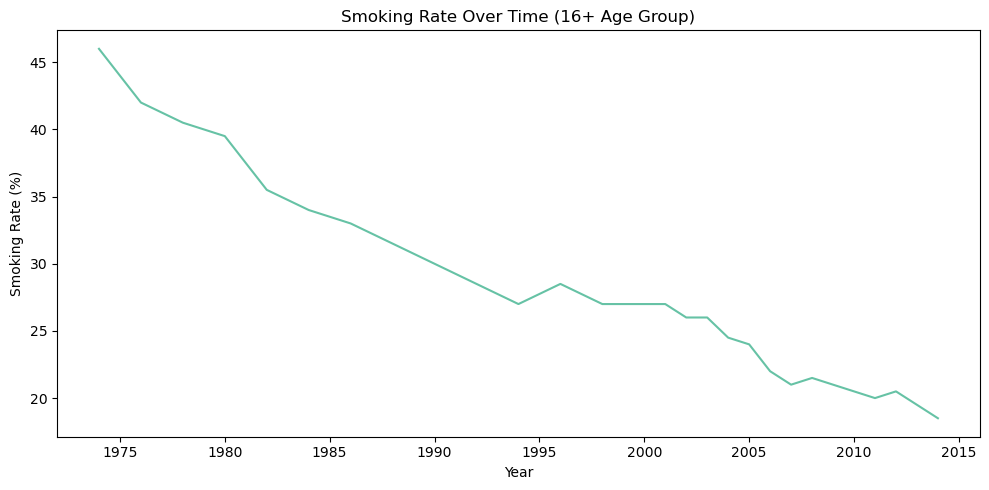

In [13]:
# Filter total group
smoking_trend = smokers[smokers["Sex"] == "All"] if "All" in smokers["Sex"].unique() else \
    smokers.groupby("Year")["16 and Over"].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=smoking_trend, x="Year", y="16 and Over")
plt.title("Smoking Rate Over Time (16+ Age Group)")
plt.ylabel("Smoking Rate (%)")
plt.xlabel("Year")
plt.tight_layout()
plt.show()


Total Tobacco-related Fatalities Over Years

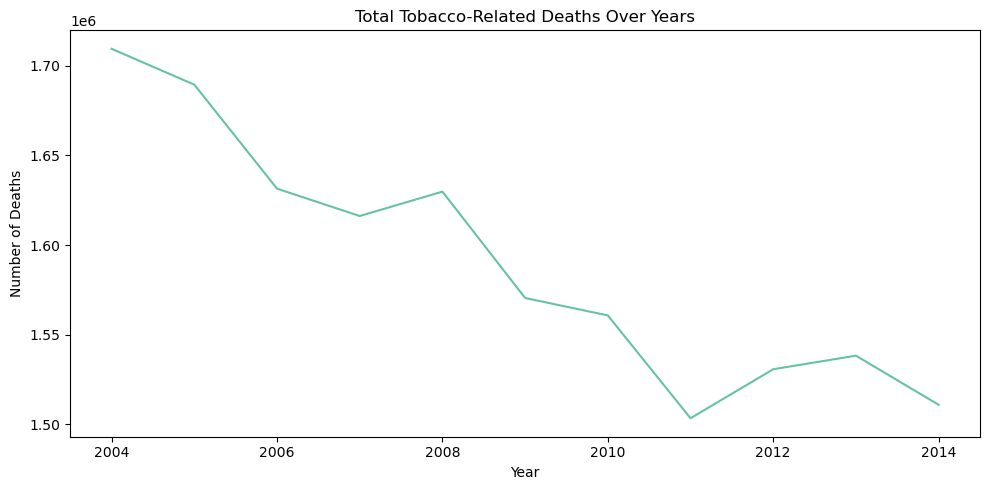

In [14]:
total_fatalities = fatalities.groupby("Year")["Value"].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=total_fatalities, x="Year", y="Value")
plt.title("Total Tobacco-Related Deaths Over Years")
plt.ylabel("Number of Deaths")
plt.xlabel("Year")
plt.tight_layout()
plt.show()


Total Hospital Admissions Over Years

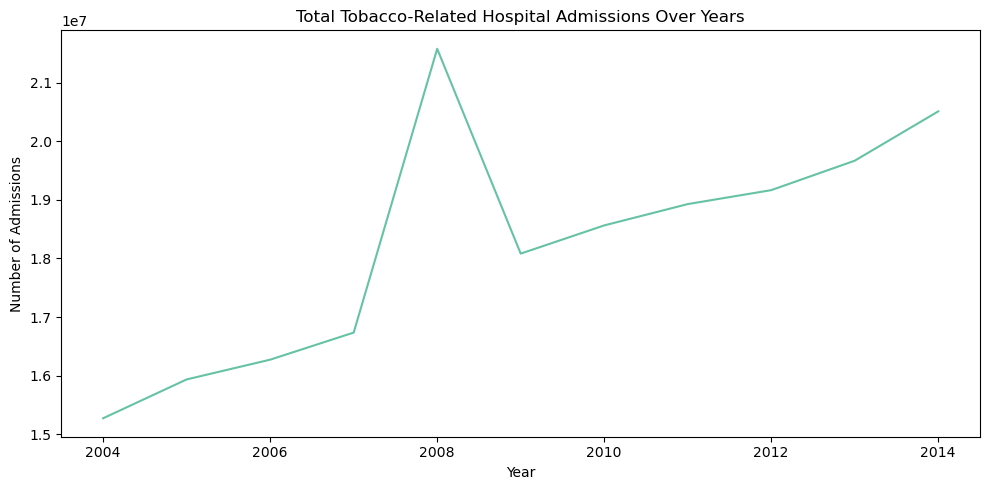

In [15]:
total_admissions = admissions.groupby("Year")["Value"].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=total_admissions, x="Year", y="Value")
plt.title("Total Tobacco-Related Hospital Admissions Over Years")
plt.ylabel("Number of Admissions")
plt.xlabel("Year")
plt.tight_layout()
plt.show()


Total Prescriptions Over Years

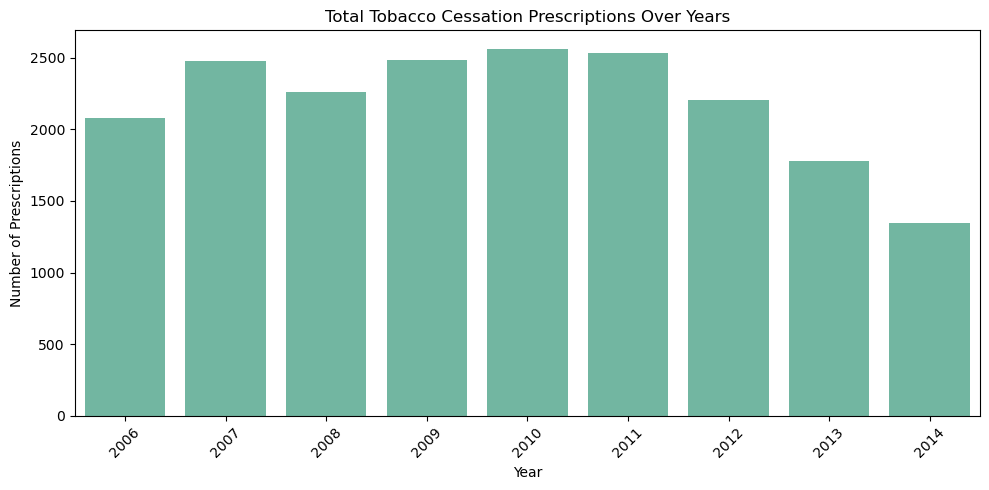

In [16]:
prescriptions_trend = prescriptions[["Year", "All Pharmacotherapy Prescriptions"]]

plt.figure(figsize=(10, 5))
sns.barplot(data=prescriptions_trend, x="Year", y="All Pharmacotherapy Prescriptions")
plt.title("Total Tobacco Cessation Prescriptions Over Years")
plt.ylabel("Number of Prescriptions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


BIVARIATE ANALYSIS

Fatalities vs Admissions Over Years

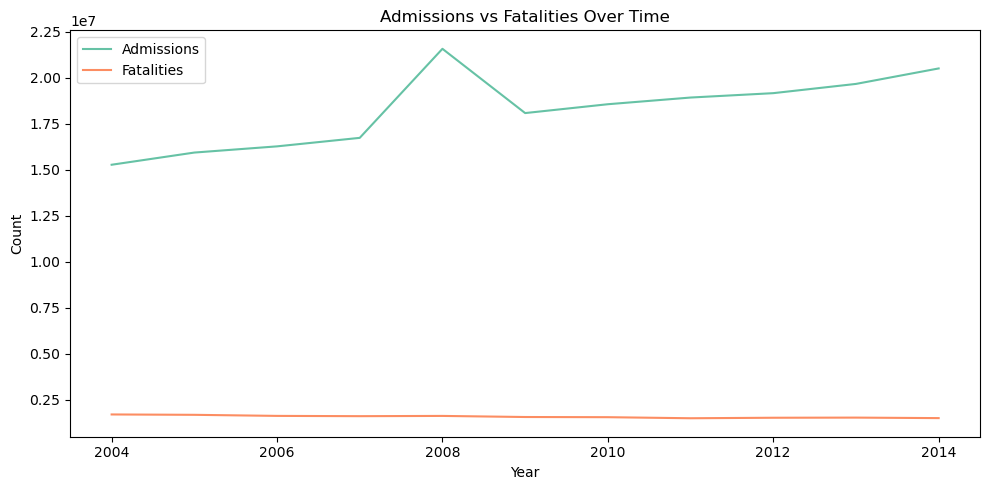

In [17]:
merged_df = total_admissions.merge(total_fatalities, on="Year", suffixes=('_admissions', '_fatalities'))

plt.figure(figsize=(10, 5))
sns.lineplot(data=merged_df, x="Year", y="Value_admissions", label="Admissions")
sns.lineplot(data=merged_df, x="Year", y="Value_fatalities", label="Fatalities")
plt.title("Admissions vs Fatalities Over Time")
plt.ylabel("Count")
plt.xlabel("Year")
plt.legend()
plt.tight_layout()
plt.show()


Heatmap of Smoking Rates by Age Group

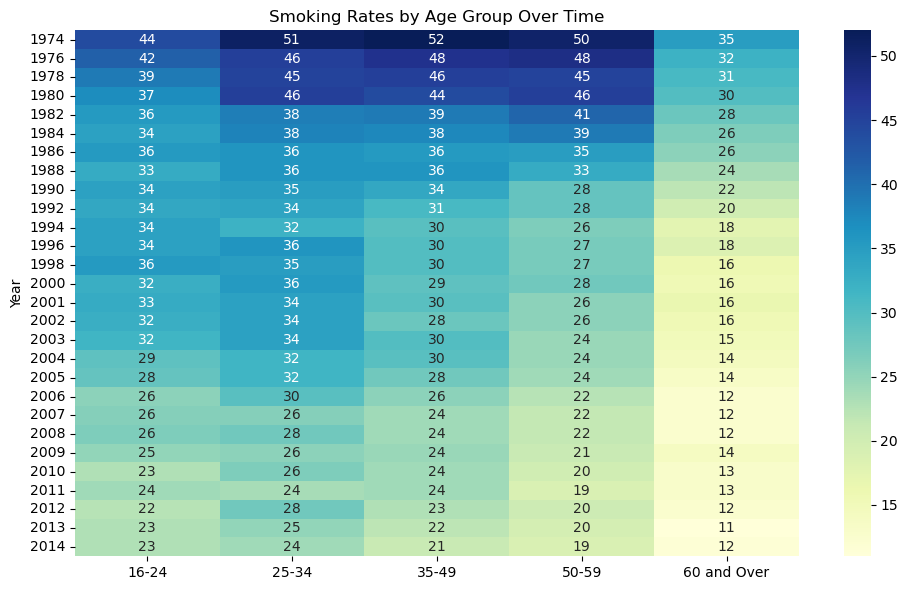

In [18]:
smoking_pivot = smokers.pivot_table(index="Year", values=["16-24", "25-34", "35-49", "50-59", "60 and Over"])

plt.figure(figsize=(10, 6))
sns.heatmap(smoking_pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Smoking Rates by Age Group Over Time")
plt.tight_layout()
plt.show()
